# Starter Classes

All neccesary classes and start of project

In [2]:
#All neccesary classes for project

#general
import seaborn as sns
import scipy.stats as ss
import pandas as pd
import numpy as np
import os
import pickle

#for preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import tensorflow as tf

#for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#for utility packages
from Utilities.utilities import import_data
from Utilities.utilities import DataFrameSelector
from Utilities.utilities import CategoricalEncoder
from Utilities.utilities import display_scores
from Utilities.utilities import pipeline_transform

In [ ]:
#If you want to use parallel computing to see it run on a cluster that code is given here
#Make sure to use ipyparallel to start a cluster prior to running this code. 

import ipyparallel as ipp
c = ipp.Client()
c.ids
dview = c[:]

# Import the training Data

Here the data is imported

In [3]:
#Get Data

raw_data = import_data("cleaned_factored_2_1.csv")
raw_data_subsets = import_data("gene_list_subset.csv")

raw_data_dmso = raw_data.loc[raw_data["sch"]==0]
raw_data_dmso = raw_data_dmso.loc[raw_data["ly3"]==0]
raw_data_dmso = raw_data_dmso.reset_index().drop("index", axis=1)

raw_data_sch = raw_data.loc[raw_data["sch"] != 0]
raw_data_sch = raw_data_sch.loc[raw_data["ly3"] == 0]
raw_data_sch = raw_data_sch.reset_index().drop("index", axis=1)

raw_data_ly3 = raw_data.loc[raw_data["ly3"] != 0]
raw_data_ly3 = raw_data_ly3.loc[raw_data["sch"] == 0]
raw_data_ly3 = raw_data_ly3.reset_index().drop("index", axis=1)

raw_data_combo = raw_data.loc[raw_data["ly3"] != 0]
raw_data_combo = raw_data_combo.loc[raw_data["sch"] != 0]
raw_data_combo = raw_data_combo.reset_index().drop("index", axis=1)

#Build for a 4 way classifier
raw_data_all = raw_data.copy()
raw_data_all["treatment"] = raw_data["ly3"] + raw_data["sch"]

raw_data_all["treatment"] = raw_data_all["treatment"].replace([0], 'DMSO')
raw_data_all["treatment"] = raw_data_all["treatment"].replace([40], 'SCH')
raw_data_all["treatment"] = raw_data_all["treatment"].replace([300], 'LY3')
raw_data_all["treatment"] = raw_data_all["treatment"].replace([340], 'COMBO')

raw_data_all_mia = raw_data_all.loc[raw_data_all["cell.line"] == "MIA PaCa-2"].reset_index().drop("index", axis=1)
raw_data_all_pa02 = raw_data_all.loc[raw_data_all["cell.line"] == "Pa02C"].reset_index().drop("index", axis=1)
raw_data_all_pa14 = raw_data_all.loc[raw_data_all["cell.line"] == "Pa14C"].reset_index().drop("index", axis=1)
raw_data_all_pa16 = raw_data_all.loc[raw_data_all["cell.line"] == "Pa16C"].reset_index().drop("index", axis=1)

raw_data_all = raw_data_all.drop("sch", axis = 1)
raw_data_all = raw_data_all.drop("ly3", axis = 1).reset_index().drop("index", axis=1)

raw_data

,cell.line,time,sch,ly3,Acetyl.CoA.S79,Akt.S473,Akt.T308,ATM.S1981,BAD.S112,c.Abl.Y245,...,Jak1.Y1022.1023,LKB1.S334,Raf.S259,Ras.GRF1,Ras.GRF1.S916,Rb.S780,RSK3.T356.360,S6.Ribosomal.protein.S235.236,S6.Ribosomal.Protein.S240.244,MARCKS.S152.156
0,MIA PaCa-2,0.25,0,0,100710.008000,2190.751495,6406.064145,3793.332410,5756.011077,14957.97552,...,7230.038785,24834.767990,15898.813880,18398.045130,8866.187405,24587.652290,22925.382040,7354.001589,19283.394700,9330.088637
1,MIA PaCa-2,0.25,0,300,62943.966610,1835.367231,5955.082819,6348.663296,5297.550428,16797.74771,...,6660.833466,23388.516190,15693.474250,16949.606820,7762.034672,20785.281380,16564.218780,2032.455817,7502.565710,4027.896834
2,MIA PaCa-2,0.25,40,0,76879.919760,2266.517592,7273.553192,5978.949121,11047.952760,14691.14583,...,7517.584767,19283.394700,16285.003850,18657.428070,8030.484774,20394.088040,17588.483470,5508.239386,15168.859000,8127.431788
3,MIA PaCa-2,0.25,40,300,66836.168440,2721.667220,8250.257154,7855.740856,5967.004037,12468.98644,...,7244.512282,14559.521290,11920.318730,15537.318010,8217.324422,19187.234470,20640.293090,6425.306732,15063.048210,8569.800701
4,Pa02C,0.25,0,0,56954.034500,20973.189560,15214.437850,9623.852501,16881.948700,14086.89836,...,4577.919429,14544.963160,14486.903710,19091.535550,19830.976380,19034.341830,18939.405490,19732.066710,30333.248340,9537.628101
5,Pa02C,0.25,0,300,44801.640590,24343.018710,16090.750300,8612.757991,21547.168340,14058.74135,...,3522.759171,13440.120300,12246.556900,16613.990360,19811.147300,16203.780200,25591.092440,15490.771890,27173.568630,10970.887470
6,Pa02C,0.25,40,0,77652.593580,21015.174870,15803.713470,9740.035245,25848.293120,15367.34901,...,4929.536564,13160.821890,18713.489250,18398.045130,20619.654780,17712.034240,24343.018710,28566.792730,32532.678110,13561.637900
7,Pa02C,0.25,40,300,53103.606000,15756.369290,11452.916790,4027.896834,20150.819810,17309.31067,...,4464.891899,10229.181050,14371.465460,15413.509580,19225.644550,16203.780200,17535.809260,20516.811470,30333.248340,10239.419480
8,Pa14C,0.25,0,0,26108.078760,2409.079924,5773.306535,4319.955110,25084.367300,13904.94709,...,4264.157071,10970.887470,20150.819810,14943.033230,6781.811647,13711.635020,18564.389340,24834.767990,30638.109570,12977.854940
9,Pa14C,0.25,0,300,24587.652290,2667.774649,5382.991843,4518.793743,25591.092440,14157.49735,...,5213.465179,10498.627620,17483.276130,14720.555390,6870.554108,13932.782800,16983.537490,26108.078760,32859.613140,10796.742020


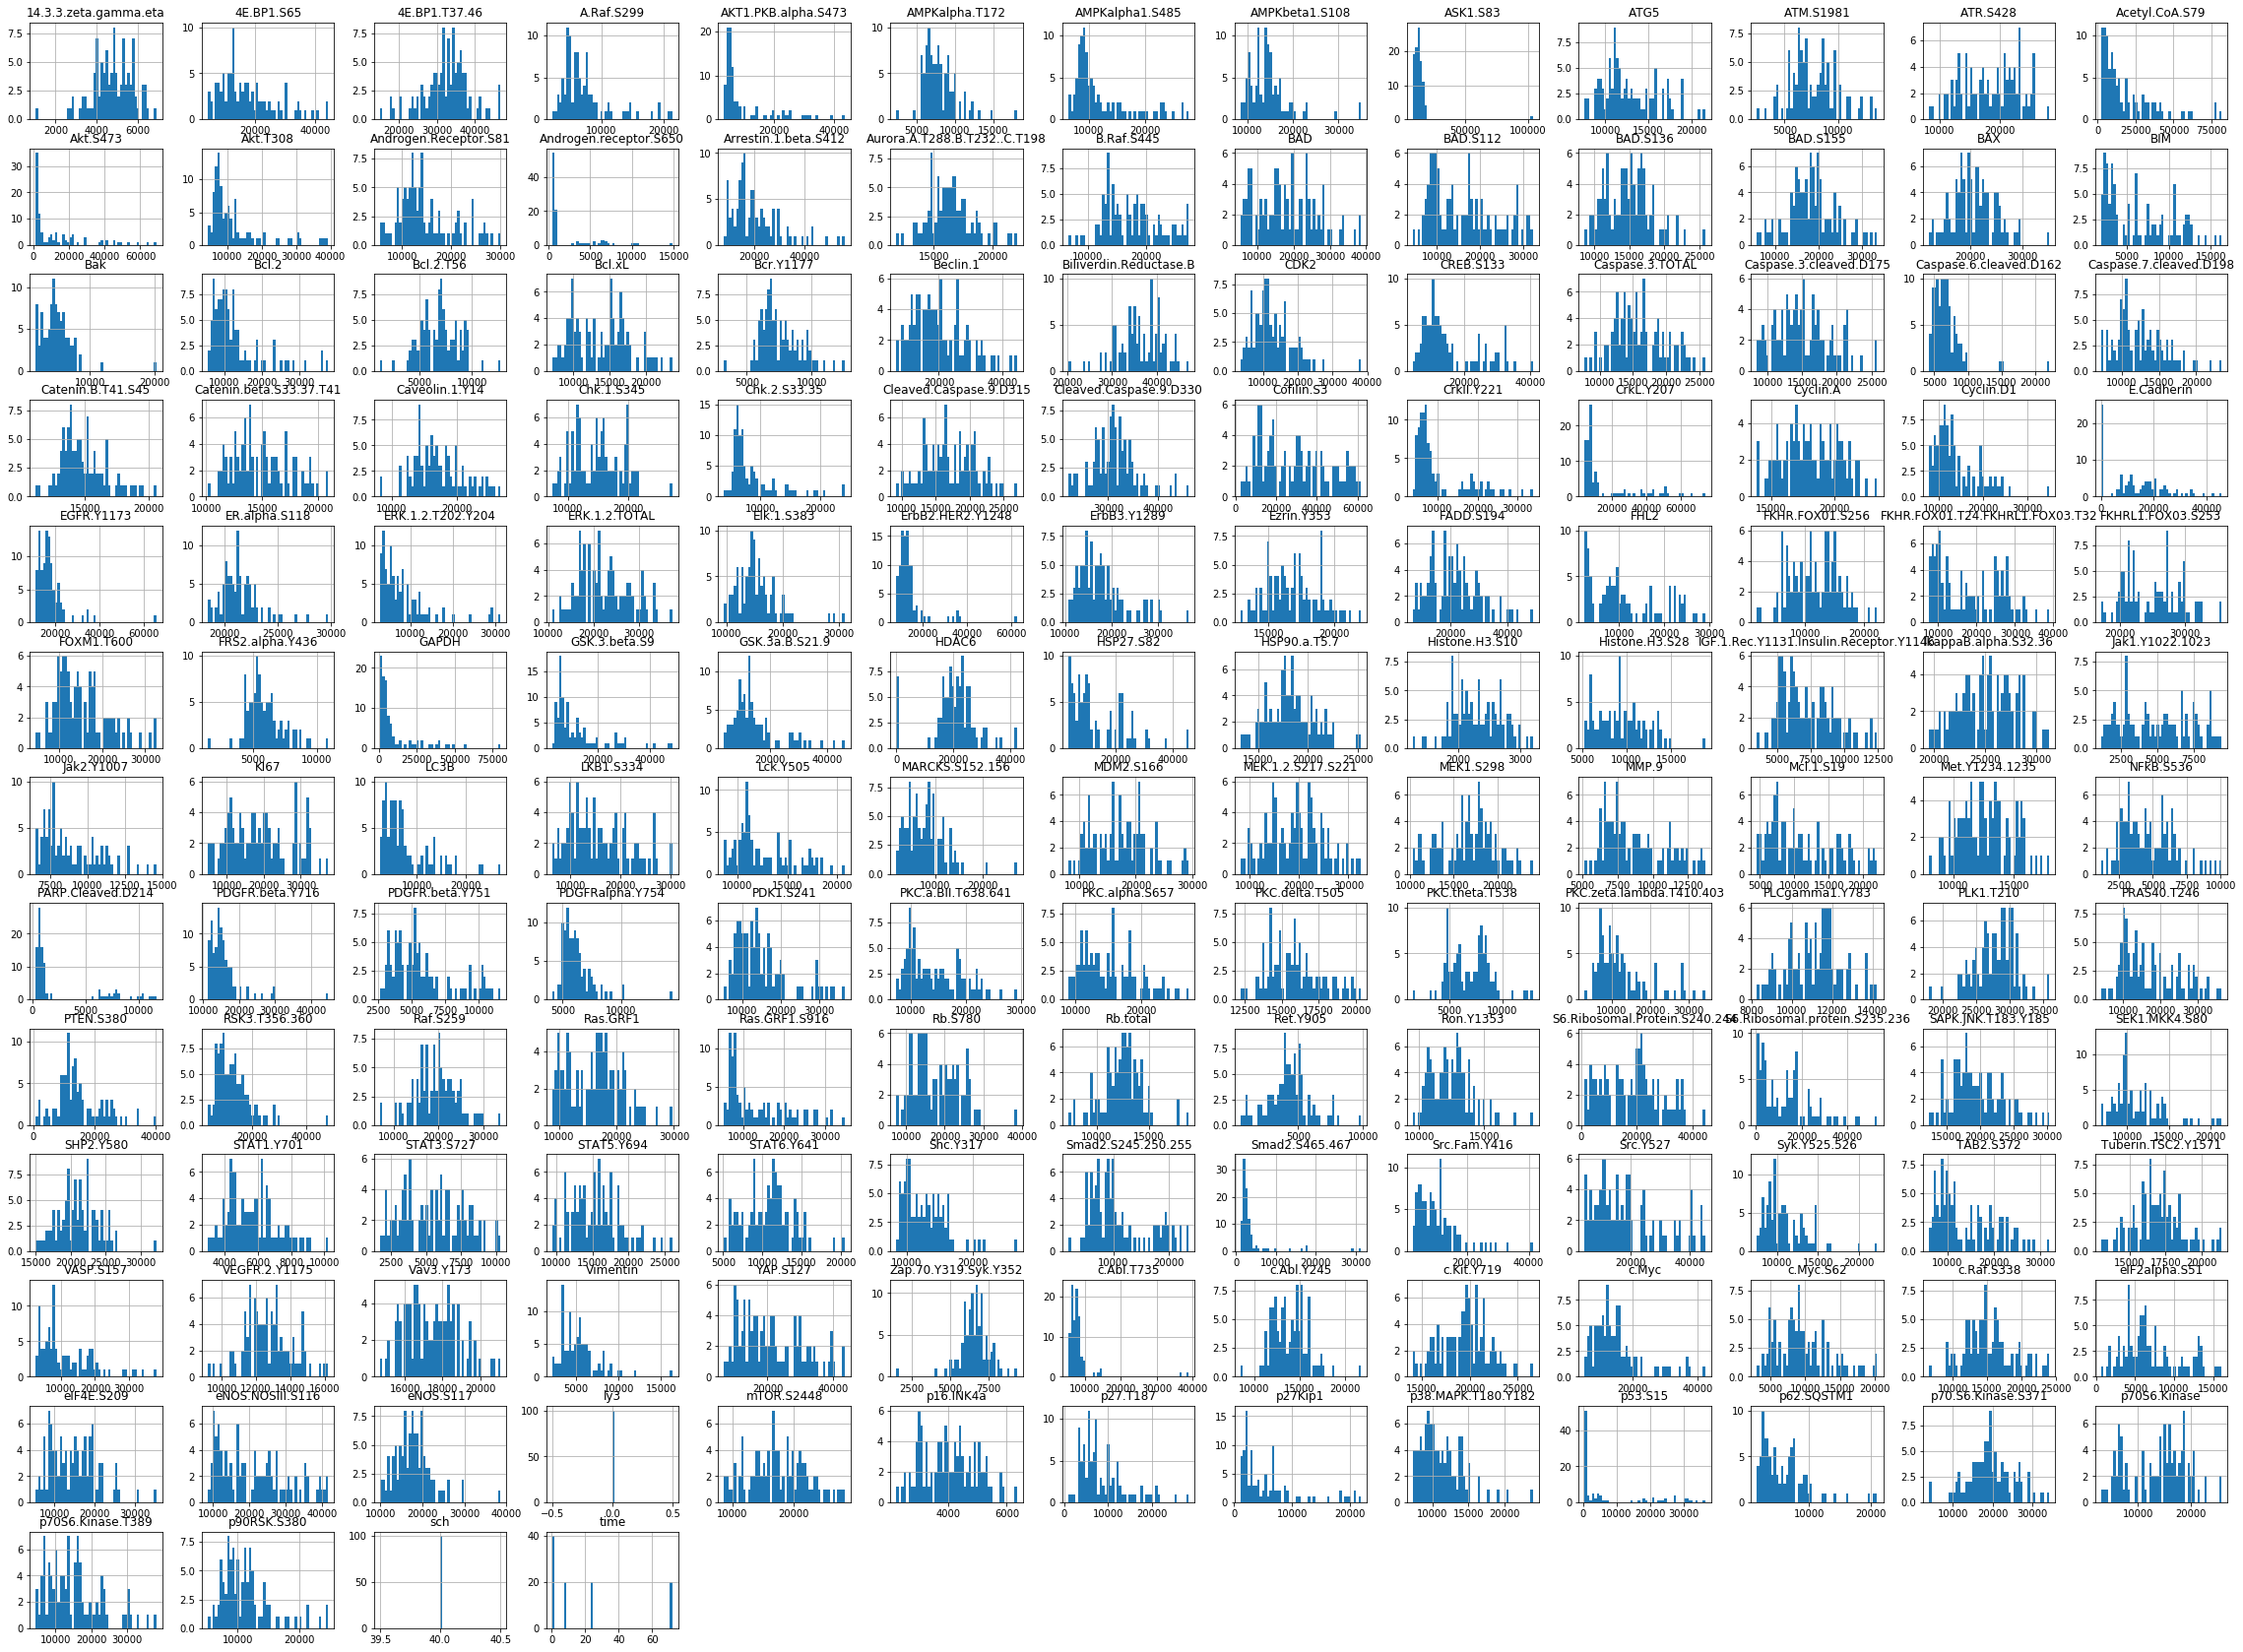

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
raw_data_sch.reindex(sorted(raw_data_sch.columns), axis=1)
raw_data_sch.hist(bins=50, figsize=(40,30))
plt.show()

# Prepare Data for Machine Learning

This work flow will break apart a training set and test set as well as put the data through a pipeline to prepare it for fitting to a model

In [62]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in split.split(raw_data, raw_data["cell.line"]):
    strat_train_set = raw_data.loc[train_index]
    strat_test_set = raw_data.loc[test_index]

for train_index, test_index in split.split(raw_data_all, raw_data_all["cell.line"]):
    strat_train_set_all = raw_data_all.loc[train_index]
    strat_test_set_all = raw_data_all.loc[test_index]
    
for train_index, test_index in split.split(raw_data_all_mia, raw_data_all_mia["cell.line"]):
    strat_train_set_all_mia = raw_data_all_mia.loc[train_index]
    strat_test_set_all_mia = raw_data_all_mia.loc[test_index]

for train_index, test_index in split.split(raw_data_all_pa02, raw_data_all_pa02["cell.line"]):
    strat_train_set_all_pa02 = raw_data_all_pa02.loc[train_index]
    strat_test_set_all_pa02 = raw_data_all_pa02.loc[test_index]
    
for train_index, test_index in split.split(raw_data_all_pa14, raw_data_all_pa14["cell.line"]):
    strat_train_set_all_pa14 = raw_data_all_pa14.loc[train_index]
    strat_test_set_all_pa14 = raw_data_all_pa14.loc[test_index]
    
for train_index, test_index in split.split(raw_data_all_pa16, raw_data_all_pa16["cell.line"]):
    strat_train_set_all_pa16 = raw_data_all_pa16.loc[train_index]
    strat_test_set_all_pa16 = raw_data_all_pa16.loc[test_index]

for train_index, test_index in split.split(raw_data_dmso, raw_data_dmso["cell.line"]):
    strat_train_set_dmso = raw_data_dmso.loc[train_index]
    strat_test_set_dmso = raw_data_dmso.loc[test_index]
    
for train_index, test_index in split.split(raw_data_sch, raw_data_sch["cell.line"]):
    strat_train_set_sch = raw_data_sch.loc[train_index]
    strat_test_set_sch = raw_data_sch.loc[test_index]
    
for train_index, test_index in split.split(raw_data_ly3, raw_data_ly3["cell.line"]):
    strat_train_set_ly3 = raw_data_ly3.loc[train_index]
    strat_test_set_ly3 = raw_data_ly3.loc[test_index]
    
for train_index, test_index in split.split(raw_data_combo, raw_data_combo["cell.line"]):
    strat_train_set_combo = raw_data_combo.loc[train_index]
    strat_test_set_combo = raw_data_combo.loc[test_index]
    
strat_train_set_time = strat_train_set_dmso.copy()
strat_test_set_time = strat_train_set_dmso.copy()
    
strat_train_sch_only

,cell.line,time,sch,ly3,Acetyl.CoA.S79,Akt.S473,Akt.T308,ATM.S1981,BAD.S112,c.Abl.Y245,...,Jak1.Y1022.1023,LKB1.S334,Raf.S259,Ras.GRF1,Ras.GRF1.S916,Rb.S780,RSK3.T356.360,S6.Ribosomal.protein.S235.236,S6.Ribosomal.Protein.S240.244,MARCKS.S152.156
74,Pa14C,24.00,0,0,3565.287236,4904.949837,7450.231362,4482.785934,23623.557560,13173.99462,...,4924.607500,10861.722830,19732.066710,20826.890520,6795.394339,10208.744610,10198.536840,22247.840550,21894.712210,4726.784509
31,Pa16C,8.00,0,0,2732.576202,16139.099220,13306.398520,6476.917767,10678.632090,13863.29117,...,2565.734072,11579.601650,17694.340780,11860.864540,20952.218390,15537.318010,18750.950960,18826.117470,26370.475350,7692.491131
93,Pa02C,24.00,0,0,13766.587410,59874.141720,35242.226780,7982.441984,28853.900370,16747.42564,...,2746.273611,22247.840550,17292.019510,18069.849340,18233.208810,23388.516190,12569.143110,25336.475180,32208.965180,5475.286060
85,Pa02C,1.00,0,0,17257.456070,55826.296740,35242.226780,10016.608990,36680.487940,16764.18822,...,6925.741575,13440.120300,21894.712210,21633.543980,24587.652290,24834.767990,20010.257220,14200.037300,17274.729140,16074.676420
49,Pa02C,8.00,0,0,9265.006354,44801.640590,33860.360590,4532.367333,30031.449240,16613.99036,...,5546.932160,10582.957450,16187.593410,16764.188220,21655.176450,19830.976380,14853.635760,12938.988700,22247.840550,6081.461337
2,Pa14C,0.25,0,0,26108.078760,2409.079924,5773.306535,4319.955110,25084.367300,13904.94709,...,4264.157071,10970.887470,20150.819810,14943.033230,6781.811647,13711.635020,18564.389340,24834.767990,30638.109570,12977.854940
56,MIA PaCa-2,72.00,0,0,38177.445590,1172.624775,6581.380580,6229.183012,9710.856407,13794.14613,...,5486.246794,13711.635020,23860.983720,15093.202270,6148.724723,16432.227530,6247.894282,823.859681,3264.949594,3484.222284
62,Pa14C,0.25,0,0,7631.193853,4031.928376,5884.048387,4505.256507,28001.119520,13629.61745,...,2643.872862,10394.162150,22247.840550,17000.536400,8168.171644,15367.349010,14883.370600,24587.652290,27446.673810,6457.514455
48,MIA PaCa-2,8.00,0,0,19302.695540,1970.415997,9672.093369,10948.958770,8857.322068,14750.02383,...,7669.446250,22471.440210,22925.382040,17518.275140,8416.927257,23155.791260,27446.673810,9818.271712,14853.635760,6754.740541
19,Pa16C,72.00,0,0,7502.565710,2628.057009,4731.511059,9740.035245,6535.471984,11591.18068,...,2522.485952,11766.362980,18564.389340,13656.901990,9769.301759,11192.508550,5913.542979,1087.895204,3512.205819,1976.336634


In [68]:
#Isolate X and Y Variable from the training set

strat_train_sch_only = strat_train_set_dmso.append(strat_train_set_sch)
strat_test_sch_only = strat_test_set_dmso.append(strat_test_set_sch)

strat_train_ly3_only = strat_train_set_dmso.append(strat_train_set_ly3)
strat_test_ly3_only = strat_test_set_dmso.append(strat_test_set_ly3)

strat_train_dmso_combo = strat_train_set_dmso.append(strat_train_set_combo)
strat_test_dmso_combo = strat_test_set_dmso.append(strat_test_set_combo)

strat_train_sch_combo = strat_train_set_sch.append(strat_train_set_combo)
strat_test_sch_combo = strat_test_set_sch.append(strat_test_set_combo)

strat_train_ly3_combo = strat_train_set_ly3.append(strat_train_set_combo)
strat_test_ly3_combo = strat_test_set_ly3.append(strat_test_set_combo)

#SCH Treatment
raw_train_sch = strat_train_sch_only.drop("sch", axis=1)
raw_train_labels_sch = pd.DataFrame(strat_train_sch_only["sch"].copy())

raw_test_sch = strat_test_sch_only.drop("sch", axis=1)
raw_test_labels_sch = pd.DataFrame(strat_test_sch_only["sch"].copy())

#SCH Time
raw_train_sch_time = strat_train_sch_only.drop("time", axis=1)
raw_train_labels_sch_time = pd.DataFrame(strat_train_sch_only["time"].copy()) * 100

raw_test_sch_time = strat_test_sch_only.drop("time", axis=1)
raw_test_labels_sch_time = pd.DataFrame(strat_test_sch_only["time"].copy()) * 100


#LY3 Treatment
raw_train_ly3 = strat_train_ly3_only.drop("ly3", axis=1)
raw_train_labels_ly3 = pd.DataFrame(strat_train_ly3_only["ly3"].copy())

raw_test_ly3 = strat_test_ly3_only.drop("ly3", axis=1)
raw_test_labels_ly3 = pd.DataFrame(strat_test_ly3_only["ly3"].copy())

#LY3 Time
raw_train_ly3_time = strat_train_ly3_only.drop("time", axis=1)
raw_train_labels_ly3_time = pd.DataFrame(strat_train_ly3_only["time"].copy()) * 100

raw_test_ly3_time = strat_test_ly3_only.drop("time", axis=1)
raw_test_labels_ly3_time = pd.DataFrame(strat_test_ly3_only["time"].copy()) * 100


#Combo Treatment
raw_train_combo = strat_train_dmso_combo.drop("ly3", axis=1)
raw_train_combo = raw_train_combo.drop("sch", axis=1)
raw_train_labels_combo = pd.DataFrame(strat_train_dmso_combo["ly3"].copy() > 0)

raw_test_combo = strat_test_dmso_combo.drop("ly3", axis=1)
raw_test_combo = raw_test_combo.drop("sch", axis=1)
raw_test_labels_combo = pd.DataFrame(strat_test_dmso_combo["ly3"].copy() > 0)

#Combo Time
raw_train_combo_time = strat_train_dmso_combo.drop("time", axis=1)
raw_train_labels_combo_time = pd.DataFrame(strat_train_dmso_combo["time"].copy()) * 100

raw_test_combo_time = raw_test_combo.drop("time", axis=1)
raw_test_labels_combo_time = pd.DataFrame(strat_test_dmso_combo["time"].copy()) * 100

#SCH vs Combo Treatment
raw_train_sch_combo = strat_train_sch_combo.drop("ly3", axis=1)
raw_train_labels_sch_combo = pd.DataFrame(strat_train_sch_combo["ly3"].copy())

raw_test_sch_combo = strat_test_sch_combo.drop("ly3", axis=1)
raw_test_labels_sch_combo = pd.DataFrame(strat_test_sch_combo["ly3"].copy())

#LY3 vs Combo Treatment
raw_train_ly3_combo = strat_train_ly3_combo.drop("sch", axis=1)
raw_train_labels_ly3_combo = pd.DataFrame(strat_train_ly3_combo["sch"].copy())

raw_test_ly3_combo = strat_test_ly3_combo.drop("sch", axis=1)
raw_test_labels_ly3_combo = pd.DataFrame(strat_test_ly3_combo["sch"].copy())

#Try to distinguish all 4
raw_train_treatment = strat_train_set_all.drop("treatment", axis=1).reset_index().drop("index", axis=1)
raw_train_labels_treatment = strat_train_set_all["treatment"].copy().reset_index().drop("index", axis=1)

raw_test_treatment = strat_test_set_all.drop("treatment", axis=1).reset_index().drop("index", axis=1)
raw_test_labels_treatment = strat_test_set_all["treatment"].copy().reset_index().drop("index", axis=1)

#Try to distinguish all 4 in mia
raw_train_treatment_mia = strat_train_set_all_mia.drop("treatment", axis=1)
raw_train_labels_treatment_mia = strat_train_set_all_mia["treatment"].copy()

raw_test_treatment_mia = strat_test_set_all_mia.drop("treatment", axis=1)
raw_test_labels_treatment_mia = strat_test_set_all_mia["treatment"].copy()

#Try to distinguish all 4 in pa02
raw_train_treatment_pa02 = strat_train_set_all_pa02.drop("treatment", axis=1)
raw_train_labels_treatment_pa02 = strat_train_set_all_pa02["treatment"].copy()

raw_test_treatment_pa02 = strat_test_set_all_pa02.drop("treatment", axis=1)
raw_test_labels_treatment_pa02 = strat_test_set_all_pa02["treatment"].copy()

#Try to distinguish all 4 in pa14
raw_train_treatment_pa14 = strat_train_set_all_pa14.drop("treatment", axis=1)
raw_train_labels_treatment_pa14 = strat_train_set_all_pa14["treatment"].copy()

raw_test_treatment_pa14 = strat_test_set_all_pa14.drop("treatment", axis=1)
raw_test_labels_treatment_pa14 = strat_test_set_all_pa14["treatment"].copy()

#Try to distinguish all 4 in pa16
raw_train_treatment_pa16 = strat_train_set_all_pa16.drop("treatment", axis=1)
raw_train_labels_treatment_pa16 = strat_train_set_all_pa16["treatment"].copy()

raw_test_treatment_pa16 = strat_test_set_all_pa16.drop("treatment", axis=1)
raw_test_labels_treatment_pa16 = strat_test_set_all_pa16["treatment"].copy()


#try to distinguish cell lines
raw_train_cell = strat_train_set.drop("cell.line", axis=1)
cell_labels_train = strat_train_set["cell.line"].copy()

raw_test_cell = strat_test_set.drop("cell.line", axis=1)
cell_labels_test = strat_test_set["cell.line"].copy()

#try to distinguish time
raw_train_time = strat_train_set_dmso.drop("time", axis=1)
raw_train_labels_time = strat_train_set_dmso["time"].copy()

raw_test_time = strat_test_set_dmso.drop("time", axis=1)
raw_test_labels_time = strat_test_set["time"].copy()

raw_train_treatment

,cell.line,time,Acetyl.CoA.S79,Akt.S473,Akt.T308,ATM.S1981,BAD.S112,c.Abl.Y245,Cleaved.Caspase.9.D315,Cleaved.Caspase.9.D330,...,Jak1.Y1022.1023,LKB1.S334,Raf.S259,Ras.GRF1,Ras.GRF1.S916,Rb.S780,RSK3.T356.360,S6.Ribosomal.protein.S235.236,S6.Ribosomal.Protein.S240.244,MARCKS.S152.156
0,MIA PaCa-2,72.00,32208.965180,989.302190,5029.117314,2858.351054,8595.550935,10818.355540,17535.80926,35954.14916,...,5738.767431,14794.344180,30638.109570,17836.452890,6561.664323,18106.022570,11837.168230,1939.140614,7346.655299,7982.441984
1,Pa16C,1.00,4007.807157,13521.010450,12112.586860,8544.135756,9009.185497,12708.162840,9237.25059,23860.98372,...,1165.610042,7230.038785,16547.656150,9808.454381,14314.098560,11384.409980,9509.055627,4545.986030,12569.143110,3059.479318
2,Pa02C,0.25,53103.606000,15756.369290,11452.916790,4027.896834,20150.819810,17309.310670,15244.89496,27446.67381,...,4464.891899,10229.181050,14371.465460,15413.509580,19225.644550,16203.780200,17535.809260,20516.811470,30333.248340,10239.419480
3,Pa16C,72.00,4900.045357,3529.811228,5848.846764,6355.017704,8786.751266,12746.347880,18920.46790,31257.05474,...,1861.242967,13534.530780,11813.519260,9311.448457,10456.720020,12861.580530,3093.318378,1613.240481,5182.280297,1152.858963
4,Pa02C,0.25,17925.860540,38561.144130,25336.475180,3936.313396,30638.109570,16187.593410,14002.62276,30333.24834,...,2056.992383,14242.705070,18601.552580,14603.255290,24100.796110,19970.279600,17553.344200,9847.763916,19206.420750,13575.198860
5,Pa02C,0.25,18863.804650,40538.185340,28001.119520,6555.109539,30638.109570,14794.344180,12506.45281,31888.47332,...,4726.784509,12708.162840,24834.767990,21655.176450,20373.695900,22925.382040,21698.526990,20292.369780,22471.440210,11849.016110
6,MIA PaCa-2,24.00,35596.391250,1902.644650,2910.266196,7646.477698,6033.001480,8416.927257,14357.09537,30638.10957,...,6700.922079,14058.741350,12481.466710,13974.647530,6081.461337,9358.123358,3274.759999,102.002773,537.538389,9117.947752
7,Pa16C,0.25,4846.441780,6960.451158,6522.415047,5653.331765,7654.123795,13134.528460,20211.34900,23388.51619,...,1042.106977,7208.386176,5675.988734,7934.694180,7150.946467,8655.930611,5901.722939,10435.828990,21982.460070,1352.892319
8,Pa02C,1.00,25084.367300,37421.464390,22925.382040,6714.336360,31571.170480,17309.310670,16333.93646,30946.03477,...,6425.306732,17979.723530,22026.465790,20557.883180,31257.054740,25591.092440,26370.475350,13615.989140,19399.452930,26370.475350
9,Pa16C,1.00,3337.575473,22925.382040,12606.910430,6335.979576,20110.561360,14200.037300,10775.17167,26635.48372,...,2102.747334,6727.777496,16713.966680,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#Treatment
train_treatment = pipeline_transform(raw_train_treatment)
test_treatment = pipeline_transform(raw_test_treatment)

train_sch_time = pipeline_transform(raw_train_sch_time)
test_sch_time = pipeline_transform(raw_test_sch_time)

train_ly3_time = pipeline_transform(raw_train_ly3_time)
test_ly3_time = pipeline_transform(raw_test_ly3_time)

train_combo_time = pipeline_transform(raw_train_ly3_time)
test_combo_time = pipeline_transform(raw_test_ly3_time)

train_treatment

,time,Acetyl.CoA.S79,Akt.S473,Akt.T308,ATM.S1981,BAD.S112,c.Abl.Y245,Cleaved.Caspase.9.D315,Cleaved.Caspase.9.D330,Chk.1.S345,...,Ras.GRF1.S916,Rb.S780,RSK3.T356.360,S6.Ribosomal.protein.S235.236,S6.Ribosomal.Protein.S240.244,MARCKS.S152.156,MIA PaCa-2,Pa02C,Pa14C,Pa16C
0,72.00,32208.965180,989.302190,5029.117314,2858.351054,8595.550935,10818.355540,17535.80926,35954.14916,11754.597750,...,6561.664323,18106.022570,11837.168230,1939.140614,7346.655299,7982.441984,1.0,0.0,0.0,0.0
1,1.00,4007.807157,13521.010450,12112.586860,8544.135756,9009.185497,12708.162840,9237.25059,23860.98372,8258.514877,...,14314.098560,11384.409980,9509.055627,4545.986030,12569.143110,3059.479318,0.0,0.0,0.0,1.0
2,0.25,53103.606000,15756.369290,11452.916790,4027.896834,20150.819810,17309.310670,15244.89496,27446.67381,8664.594374,...,19225.644550,16203.780200,17535.809260,20516.811470,30333.248340,10239.419480,0.0,1.0,0.0,0.0
3,72.00,4900.045357,3529.811228,5848.846764,6355.017704,8786.751266,12746.347880,18920.46790,31257.05474,10678.632090,...,10456.720020,12861.580530,3093.318378,1613.240481,5182.280297,1152.858963,0.0,0.0,0.0,1.0
4,0.25,17925.860540,38561.144130,25336.475180,3936.313396,30638.109570,16187.593410,14002.62276,30333.24834,10046.706540,...,24100.796110,19970.279600,17553.344200,9847.763916,19206.420750,13575.198860,0.0,1.0,0.0,0.0
5,0.25,18863.804650,40538.185340,28001.119520,6555.109539,30638.109570,14794.344180,12506.45281,31888.47332,11170.147520,...,20373.695900,22925.382040,21698.526990,20292.369780,22471.440210,11849.016110,0.0,1.0,0.0,0.0
6,24.00,35596.391250,1902.644650,2910.266196,7646.477698,6033.001480,8416.927257,14357.09537,30638.10957,10927.084320,...,6081.461337,9358.123358,3274.759999,102.002773,537.538389,9117.947752,1.0,0.0,0.0,0.0
7,0.25,4846.441780,6960.451158,6522.415047,5653.331765,7654.123795,13134.528460,20211.34900,23388.51619,5569.162709,...,7150.946467,8655.930611,5901.722939,10435.828990,21982.460070,1352.892319,0.0,0.0,0.0,1.0
8,1.00,25084.367300,37421.464390,22925.382040,6714.336360,31571.170480,17309.310670,16333.93646,30946.03477,19091.535550,...,31257.054740,25591.092440,26370.475350,13615.989140,19399.452930,26370.475350,0.0,1.0,0.0,0.0
9,1.00,3337.575473,22925.382040,12606.910430,6335.979576,20110.561360,14200.037300,10775.17167,26635.48372,7903.021087,...,9710.856407,15367.349010,11384.409980,8901.720598,16531.125840,7129.523926,0.0,0.0,0.0,1.0


# Ready for Machine Learning:

At this point the data is in the proper format for training your model. Relevant variables listed below:

The Training Data:

x_train_data - The X in your model. These are what we are going to use to make predictions. 

y_train_data - The Y in your model. These are the values you are going to try and predict.

The Test Data:

x_test_data - The X data for your test data. Use this to test your completed model 

y_test_data - the Y data for your test data. Use this to test your model againt real predictions

In [86]:
X_train = train_combo_time
Y_train = raw_train_labels_combo_time

X_test = test_combo_time
Y_test = raw_test_labels_combo_time

In [83]:
#Fit a decision Tree

tree_clf = DecisionTreeClassifier(max_depth=150)
tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=150,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
tree_clf_cell = DecisionTreeClassifier(max_depth=150)
tree_clf_cell.fit(cell_train, cell_labels_train)

In [ ]:
classes = list(map(str, tree_clf.classes_))
classes

classes_cell = list(map(str, tree_clf_cell.classes_))
classes_cell

classes

In [84]:
# Export the tree

export_graphviz(
    tree_clf,
    out_file="C:/Users/sdgeo/Dropbox/Der Lab/Data/IremRPPA/decision_tree_combo_time.dot",
    feature_names=list(X_train.columns.values),
    class_names=list(map(str, tree_clf.classes_)),
    rounded=True,
    filled=True
)

os.system("dot -Tpng decision_tree_combo_time.dot -o decision_tree_combo_time.png")

0

In [ ]:
# Export the tree

export_graphviz(
    tree_clf_cell,
    out_file="C:/Users/sdgeo/Dropbox/Der Lab/Data/IremRPPA/decision_tree_cell.dot",
    feature_names=list(cell_train.columns.values),
    class_names=classes_cell,
    rounded=True,
    filled=True
)

os.system("dot -Tpng decision_tree_cell.dot -o decision_tree_cell.png")

In [89]:
pred = tree_clf.predict(X_test)
confusion_matrix(pred, Y_test)

array([[6, 3, 2, 2, 1],
       [3, 6, 0, 0, 1],
       [1, 8, 2, 1, 2],
       [2, 1, 0, 6, 3],
       [0, 0, 0, 1, 9]], dtype=int64)

In [90]:
score = f1_score(pred, Y_test, average="macro")
score

0.47001887001887005

# Random Forest Model with GridSearchCV and RandomSearchCV


Uses a random forest and GridSearchCV to predict the hyperparameters and generate a model

In [ ]:
#fit a basic forest regression to ensure data is in proper format

for_clf = RandomForestClassifier()
for_clf.fit(x_train_data, y_train_data)

data_predict = for_clf.predict(x_train_data)
confusion_matrix(y_train_data, data_predict)
f1_score(y_train_data, data_predict, average="macro")

In [ ]:
#fit a basic forest regression to ensure data is in proper format

for_reg = RandomForestRegressor()
for_reg.fit(prepared_data, data_labels)
kir_scores = cross_val_score(for_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv=10)

data_predict = for_reg.predict(prepared_data)
for_mse = mean_squared_error(data_labels, data_predict)
for_rmse = np.sqrt(for_mse)

display_scores(-kir_scores)

In [ ]:
#Do optomization by doing a grid search

param_grid = [
    {'n_estimators': [80,100,120], 'max_features': [50,60,70,80,90,100]},
    {'bootstrap': [False], 'n_estimators': [80,100,120], 'max_features': [50,60,70,80,90,100]}
]

forest_reg = RandomForestRegressor()

for_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
for_search.fit(prepared_data, data_labels)

In [ ]:
param_grid = [
    {'n_estimators': [80,100,120], 'max_features': [50,60,70,80,90,100]},
    {'bootstrap': [False], 'n_estimators': [80,100,120], 'max_features': [50,60,70,80,90,100]}
]

forest_clf = RandomForestClassifier()

for_search_clf = GridSearchCV(forest_clf, param_grid, cv=5, scoring='accuracy')
for_search_clf.fit(prepared_data, data_labels)

In [ ]:
#Do a random search for best iterations

param_grid_random = {
        'bootstrap': [True, False],
        'n_estimators': list(range(50,500)),
        'max_features': list(range(1,150)),
    }

forest_reg_rand = RandomForestRegressor()

for_random = RandomizedSearchCV(forest_reg_rand, param_distributions=param_grid_random,
                                n_iter=100, cv=2, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=-1, random_state=42)


for_random.fit(prepared_data, data_labels)

In [ ]:
simple_forest = RandomForestClassifier()
simple_forest.fit(train_treatment, raw_train_labels_treatment)

In [ ]:
train_sch

In [ ]:
#Do a random search for best iterations

param_grid_random = {
        'n_estimators': list(range(300,400)),
        'max_features': list(range(30,150)),
    }

forest_reg_rand_clf = RandomForestClassifier(bootstrap = True)

for_random_clf = RandomizedSearchCV(forest_reg_rand_clf, param_distributions=param_grid_random,
                                n_iter=250, cv=5, scoring='f1_macro',
                                verbose=2, n_jobs=-1, random_state=42)


for_random_clf.fit(train_combo, raw_train_labels_combo["ly3"])

# Save Models

Use this to save any models that you have created

In [ ]:
# Code to save a model

pickle.dump(for_random_clf, open('models/random_forest_trained_combo.sav', 'wb'))

In [ ]:
#can load it with this code

loaded_model = pickle.load(open('models/random_forest_trained_treatment.sav', 'rb'))

In [ ]:
pred = loaded_model.best_estimator_.predict(test_combo)
score = f1_score(pred,raw_test_labels_combo["ly3"], average='macro')
score

# Evaluate Fits 

Test to see if the fits are good and give metrics

In [ ]:
search_found = loaded_model

In [ ]:
search_found.best_params_

In [ ]:
cvres = search_found.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:

feature_importances = search_found.best_estimator_.feature_importances_
sorted(zip(feature_importances, train_treatment.columns.values), reverse=True)

In [ ]:
scores = cross_val_score(search_found.best_estimator_, x_train_data, y_train_data, scoring="f1_macro", cv=5)
scores

In [ ]:
pred = search_found.best_estimator_.predict(test_treatment)
confusion_matrix(pred, raw_test_labels_treatment)

In [ ]:
score = f1_score(pred, raw_test_labels_treatment, average="macro")
score

# PCA

In [ ]:
pca = PCA(n_components = 4)
X2D = pca.fit_transform(train_treatment)

pca.explained_variance_ratio_

In [ ]:
cumsum = np.sum(pca.explained_variance_ratio_)

In [ ]:
cumsum

# Unsupervised Learning

In [ ]:

clustering_data_train = pipeline_transform(raw_train_treatment.drop("cell.line", axis=1), scaler=True)
clustering_data_test = pipeline_transform(raw_test_treatment.drop("cell.line", axis=1), scaler=True)

clustering_data_train

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(clustering_data_train)
predicted = kmeans.predict(clustering_data_test)

In [ ]:
clustering_train_post = clustering_data_train.copy()
clustering_train_post["cluster"] = kmeans.labels_
clustering_train_post["cell.line"] = list(raw_train_treatment["cell.line"])

clustering_test_post = clustering_data_test.copy()
clustering_test_post["cluster"] = predicted
clustering_test_post["cell.line"] = list(raw_test_treatment["cell.line"])

clustering_test_post

In [ ]:
cluster_train_post = clustering_train_post.copy()
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['MIA PaCa-2'], 3)
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['Pa02C'], 1)
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['Pa14C'], 2)
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['Pa16C'], 0)

cluster_test_post = clustering_test_post.copy()
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['MIA PaCa-2'], 3)
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['Pa02C'], 1)
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['Pa14C'], 2)
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['Pa16C'], 0)

cluster_test_post

In [ ]:
cluster_test_post.plot(kind="scatter", x="cell.line", y="cluster", alpha=0.1)

In [ ]:
cell_corr = ss.spearmanr(cluster_test_post["cell.line"], cluster_test_post["cluster"])
cell_corr

# DNN

Here we will build a 2 layer neural network and see what the best predictability possible is:

In [6]:
def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "/Users/sdgeo/Dropbox/Der Lab/Data/IremRPPA/tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-final-" + now
    return "{}/{}/".format(root_logdir, name)

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train.iloc[rnd_indices]
    y_batch = y_train.iloc[rnd_indices]
    return X_batch, y_batch

In [7]:
train_treatment_tensor = pipeline_transform(raw_train_treatment, scaler=True)
test_treatment_tensor = pipeline_transform(raw_test_treatment, scaler=True)

In [8]:


raw_train_labels_tensor = pd.DataFrame(raw_train_labels_treatment['treatment'].replace(['DMSO'], 0))
raw_train_labels_tensor = pd.DataFrame(raw_train_labels_tensor['treatment'].replace(['SCH'], 1))
raw_train_labels_tensor = pd.DataFrame(raw_train_labels_tensor['treatment'].replace(['LY3'], 2))
raw_train_labels_tensor = pd.DataFrame(raw_train_labels_tensor['treatment'].replace(['COMBO'], 3))

raw_test_labels_tensor = pd.DataFrame(raw_test_labels_treatment['treatment'].replace(['DMSO'], 0))
raw_test_labels_tensor = pd.DataFrame(raw_test_labels_tensor['treatment'].replace(['SCH'], 1))
raw_test_labels_tensor = pd.DataFrame(raw_test_labels_tensor['treatment'].replace(['LY3'], 2))
raw_test_labels_tensor = pd.DataFrame(raw_test_labels_tensor['treatment'].replace(['COMBO'], 3))

raw_test_labels_tensor_final = list(raw_test_labels_tensor['treatment'])
raw_train_labels_tensor_final = list(raw_train_labels_tensor['treatment'])
test_tensor = test_treatment_tensor.as_matrix()
test_tensor

array([[ 1.88594144, -0.80043709, -0.46487579, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.88594144, -0.48909774,  0.30999717, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.09830451,  1.70482878, -0.80870903, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.49757446,  0.89847348, -0.79633442, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.88594144, -0.72913566, -0.78371168, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.09830451, -0.88033047, -0.29165895, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
reset_graph()

from datetime import datetime
from functools import partial

n_inputs = len(train_treatment.columns.values)
n_hidden1 = n_inputs
n_hidden2 = 100
n_hidden3 = 50
n_outputs = 4

#training data placeholder
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name = "y")


#he_init = tf.contrib.layers.variance_scaling_initializer()


#using tensorflow
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.elu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.elu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3", activation=tf.nn.elu)
    logits = tf.layers.dense(hidden3, n_outputs, name="outputs")
    
#Calculate the loss out fo the last layer

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
#Describe a way to train

learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
#Evaluate the model
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)
    
#make initializer and saver
init = tf.global_variables_initializer()
saver = tf.train.Saver()





In [ ]:
#set up logging
logdir = log_dir("dnn")
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_epochs = 10000
batch_size = 5

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(len(train_treatment.index) // batch_size):
            X_batch, y_batch = random_batch(train_treatment_tensor, raw_train_labels_tensor, batch_size)
            
            X_batch.as_matrix()
            y_batch = list(y_batch['treatment'])
            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        
        acc_val, acc_sum = sess.run([accuracy, accuracy_summary],feed_dict={X: test_tensor, y: raw_test_labels_tensor_final})
        file_writer.add_summary(acc_sum, epoch)
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)
        
    save_path = saver.save(sess, "/tmp/tf_rppa_example/my_model_final_item_elu.ckpt")
    
file_writer.close()

In [16]:
reset_graph()
from datetime import datetime
from functools import partial

with tf.device('/device:CPU:0'):
    n_inputs = len(train_treatment.columns.values)
    n_hidden1 = n_inputs
    n_hidden2 = 100
    n_hidden3 = 50
    n_outputs = 4
    dropout_rate = 0.5

    #training data placeholder
    X = tf.placeholder(tf.float32, shape = (None, n_inputs), name="X")
    y = tf.placeholder(tf.int64, shape=(None), name = "y")
    

    training = tf.placeholder_with_default(False, shape=(), name = 'training')

    #he_init = tf.contrib.layers.variance_scaling_initializer()
    bn_batch_norm_layer = partial(tf.layers.batch_normalization, training=training, momentum=0.9)
    he_init = tf.contrib.layers.variance_scaling_initializer()

    #using tensorflow
    with tf.name_scope("dnn"):
        X_dropout = tf.layers.dropout(X, dropout_rate, training=training)
        hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", kernel_initializer=he_init)
        hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
        bn1 = bn_batch_norm_layer(hidden1_drop)
        bn1_act = tf.nn.elu(bn1)
    
        hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2", kernel_initializer=he_init)
        hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
        bn2 = bn_batch_norm_layer(hidden2_drop)
        bn2_act = tf.nn.elu(bn2)
    
        hidden3 = tf.layers.dense(bn2_act, n_hidden3, name="hidden3", kernel_initializer=he_init)
        hidden3_drop = tf.layers.dropout(hidden3, dropout_rate, training=training)
        bn3 = bn_batch_norm_layer(hidden3_drop)
        bn3_act = tf.nn.elu(bn3)
    
        logits_before_bn = tf.layers.dense(bn3_act, n_outputs, name="outputs")
        logits = bn_batch_norm_layer(logits_before_bn)
    
#Calculate the loss out fo the last layer

    with tf.name_scope("loss"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
        loss = tf.reduce_mean(xentropy, name="loss")
    
#Describe a way to train

    learning_rate = 0.01
    with tf.name_scope("train"):
        optimizer = tf.train.AdamOptimizer(learning_rate)
        training_op = optimizer.minimize(loss)
    
    #Evaluate the model
    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        accuracy_summary = tf.summary.scalar('accuracy', accuracy)
 
    #make initializer and saver
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()



In [ ]:
reset_graph()
from datetime import datetime
from functools import partial

n_inputs = len(train_treatment.columns.values)
n_hidden1 = n_inputs
n_hidden2 = 100
n_hidden3 = 50
n_outputs = 4
batch_size = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name = "y")
    
with tf.variable_scope("queue"):
    q_one = tf.FIFOQueue(capacity=10000, dtypes=tf.float32)
    q_two = tf.FIFOQueue(capacity=10000, dtypes=tf.int64)
    enqueue_op_one = q.enqueue(train_treatment_tensor.as_matrix())
    enqueue_op_two = q.enqueue(raw_train_labels_tensor)
    X = q.dequeue_many(batch_size)
    y = q.dequeue_many(batch_size)
    
    
training = tf.placeholder_with_default(False, shape=(), name = 'training')

#he_init = tf.contrib.layers.variance_scaling_initializer()
bn_batch_norm_layer = partial(tf.layers.batch_normalization, fused=True, training=training, momentum=0.9)


#using tensorflow
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", )
    bn1 = bn_batch_norm_layer(hidden1)
    bn1_act = tf.nn.elu(bn1)
    
    hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2")
    bn2 = bn_batch_norm_layer(hidden2)
    bn2_act = tf.nn.elu(bn2)
    
    hidden3 = tf.layers.dense(bn2_act, n_hidden3, name="hidden3")
    bn3 = bn_batch_norm_layer(hidden3)
    bn3_act = tf.nn.elu(bn3)
    
    logits_before_bn = tf.layers.dense(bn3_act, n_outputs, name="outputs")
    logits = bn_batch_norm_layer(logits_before_bn)
    
#Calculate the loss out fo the last layer

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
#Describe a way to train

learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
#Evaluate the model
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)
 

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True

In [17]:

#set up logging
logdir = log_dir("dnn_batch")
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_epochs = 5000
batch_size = 5
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    current_best = 0
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(len(train_treatment.index) // batch_size):
            X_batch, y_batch = random_batch(train_treatment_tensor, raw_train_labels_tensor, batch_size)
            
            X_batch.as_matrix()
            y_batch = list(y_batch['treatment'])
            
            sess.run([training_op, extra_update_ops],feed_dict={training: True, X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        
        acc_val, acc_sum = sess.run([accuracy, accuracy_summary],feed_dict={X: test_tensor, y: raw_test_labels_tensor_final})
        file_writer.add_summary(acc_sum, epoch)
        if (acc_val > current_best):
            current_best = acc_val
            saver.save(sess, "/tmp/rppa_model/rppa_model_current_best_dropout_final.ckpt")
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)
        
file_writer.close()

0 Train accuracy: 0.2 Val accuracy: 0.30833334
1 Train accuracy: 0.6 Val accuracy: 0.34166667
2 Train accuracy: 0.4 Val accuracy: 0.39166668
3 Train accuracy: 0.4 Val accuracy: 0.375
4 Train accuracy: 0.6 Val accuracy: 0.41666666
5 Train accuracy: 0.6 Val accuracy: 0.44166666
6 Train accuracy: 0.4 Val accuracy: 0.48333332
7 Train accuracy: 0.2 Val accuracy: 0.5
8 Train accuracy: 0.8 Val accuracy: 0.5416667
9 Train accuracy: 0.0 Val accuracy: 0.56666666
10 Train accuracy: 0.4 Val accuracy: 0.53333336
11 Train accuracy: 0.8 Val accuracy: 0.53333336
12 Train accuracy: 0.4 Val accuracy: 0.575
13 Train accuracy: 0.2 Val accuracy: 0.44166666
14 Train accuracy: 0.4 Val accuracy: 0.49166667
15 Train accuracy: 0.8 Val accuracy: 0.53333336
16 Train accuracy: 0.8 Val accuracy: 0.49166667
17 Train accuracy: 0.6 Val accuracy: 0.55
18 Train accuracy: 0.8 Val accuracy: 0.5083333
19 Train accuracy: 0.6 Val accuracy: 0.5833333
20 Train accuracy: 0.6 Val accuracy: 0.59166664
21 Train accuracy: 0.8 Val a

178 Train accuracy: 1.0 Val accuracy: 0.825
179 Train accuracy: 1.0 Val accuracy: 0.85
180 Train accuracy: 1.0 Val accuracy: 0.84166664
181 Train accuracy: 1.0 Val accuracy: 0.84166664
182 Train accuracy: 0.8 Val accuracy: 0.85
183 Train accuracy: 1.0 Val accuracy: 0.8
184 Train accuracy: 0.8 Val accuracy: 0.80833334
185 Train accuracy: 1.0 Val accuracy: 0.825
186 Train accuracy: 1.0 Val accuracy: 0.78333336
187 Train accuracy: 0.8 Val accuracy: 0.7916667
188 Train accuracy: 1.0 Val accuracy: 0.81666666
189 Train accuracy: 1.0 Val accuracy: 0.825
190 Train accuracy: 0.8 Val accuracy: 0.825
191 Train accuracy: 0.8 Val accuracy: 0.875
192 Train accuracy: 1.0 Val accuracy: 0.775
193 Train accuracy: 1.0 Val accuracy: 0.7916667
194 Train accuracy: 0.8 Val accuracy: 0.85833335
195 Train accuracy: 1.0 Val accuracy: 0.81666666
196 Train accuracy: 0.8 Val accuracy: 0.8333333
197 Train accuracy: 1.0 Val accuracy: 0.8333333
198 Train accuracy: 1.0 Val accuracy: 0.76666665
199 Train accuracy: 1.0 

354 Train accuracy: 1.0 Val accuracy: 0.8
355 Train accuracy: 0.8 Val accuracy: 0.80833334
356 Train accuracy: 0.8 Val accuracy: 0.8333333
357 Train accuracy: 0.8 Val accuracy: 0.81666666
358 Train accuracy: 1.0 Val accuracy: 0.8333333
359 Train accuracy: 0.8 Val accuracy: 0.85
360 Train accuracy: 1.0 Val accuracy: 0.85
361 Train accuracy: 1.0 Val accuracy: 0.8333333
362 Train accuracy: 1.0 Val accuracy: 0.825
363 Train accuracy: 1.0 Val accuracy: 0.8333333
364 Train accuracy: 0.8 Val accuracy: 0.8333333
365 Train accuracy: 1.0 Val accuracy: 0.8
366 Train accuracy: 1.0 Val accuracy: 0.7416667
367 Train accuracy: 1.0 Val accuracy: 0.775
368 Train accuracy: 1.0 Val accuracy: 0.75
369 Train accuracy: 1.0 Val accuracy: 0.78333336
370 Train accuracy: 1.0 Val accuracy: 0.775
371 Train accuracy: 0.8 Val accuracy: 0.78333336
372 Train accuracy: 1.0 Val accuracy: 0.775
373 Train accuracy: 1.0 Val accuracy: 0.78333336
374 Train accuracy: 0.8 Val accuracy: 0.80833334
375 Train accuracy: 1.0 Val a

529 Train accuracy: 1.0 Val accuracy: 0.8666667
530 Train accuracy: 1.0 Val accuracy: 0.84166664
531 Train accuracy: 1.0 Val accuracy: 0.85833335
532 Train accuracy: 1.0 Val accuracy: 0.875
533 Train accuracy: 1.0 Val accuracy: 0.8833333
534 Train accuracy: 1.0 Val accuracy: 0.875
535 Train accuracy: 1.0 Val accuracy: 0.875
536 Train accuracy: 1.0 Val accuracy: 0.8666667
537 Train accuracy: 1.0 Val accuracy: 0.85
538 Train accuracy: 1.0 Val accuracy: 0.8333333
539 Train accuracy: 1.0 Val accuracy: 0.85833335
540 Train accuracy: 1.0 Val accuracy: 0.8333333
541 Train accuracy: 0.8 Val accuracy: 0.85
542 Train accuracy: 0.8 Val accuracy: 0.85
543 Train accuracy: 1.0 Val accuracy: 0.85833335
544 Train accuracy: 1.0 Val accuracy: 0.875
545 Train accuracy: 1.0 Val accuracy: 0.8666667
546 Train accuracy: 1.0 Val accuracy: 0.85833335
547 Train accuracy: 1.0 Val accuracy: 0.8333333
548 Train accuracy: 1.0 Val accuracy: 0.85833335
549 Train accuracy: 1.0 Val accuracy: 0.825
550 Train accuracy: 1

705 Train accuracy: 1.0 Val accuracy: 0.8666667
706 Train accuracy: 1.0 Val accuracy: 0.85
707 Train accuracy: 1.0 Val accuracy: 0.85833335
708 Train accuracy: 1.0 Val accuracy: 0.85833335
709 Train accuracy: 1.0 Val accuracy: 0.85833335
710 Train accuracy: 1.0 Val accuracy: 0.84166664
711 Train accuracy: 1.0 Val accuracy: 0.8666667
712 Train accuracy: 0.8 Val accuracy: 0.8666667
713 Train accuracy: 1.0 Val accuracy: 0.8666667
714 Train accuracy: 1.0 Val accuracy: 0.8666667
715 Train accuracy: 1.0 Val accuracy: 0.8666667
716 Train accuracy: 1.0 Val accuracy: 0.85
717 Train accuracy: 1.0 Val accuracy: 0.8666667
718 Train accuracy: 1.0 Val accuracy: 0.8833333
719 Train accuracy: 1.0 Val accuracy: 0.8666667
720 Train accuracy: 1.0 Val accuracy: 0.875
721 Train accuracy: 1.0 Val accuracy: 0.85833335
722 Train accuracy: 1.0 Val accuracy: 0.89166665
723 Train accuracy: 0.6 Val accuracy: 0.85833335
724 Train accuracy: 1.0 Val accuracy: 0.8666667
725 Train accuracy: 0.8 Val accuracy: 0.8583333

881 Train accuracy: 1.0 Val accuracy: 0.875
882 Train accuracy: 0.8 Val accuracy: 0.8833333
883 Train accuracy: 1.0 Val accuracy: 0.875
884 Train accuracy: 1.0 Val accuracy: 0.85
885 Train accuracy: 1.0 Val accuracy: 0.8666667
886 Train accuracy: 1.0 Val accuracy: 0.8833333
887 Train accuracy: 1.0 Val accuracy: 0.875
888 Train accuracy: 1.0 Val accuracy: 0.9
889 Train accuracy: 1.0 Val accuracy: 0.9
890 Train accuracy: 1.0 Val accuracy: 0.8833333
891 Train accuracy: 1.0 Val accuracy: 0.8666667
892 Train accuracy: 1.0 Val accuracy: 0.8666667
893 Train accuracy: 0.8 Val accuracy: 0.85
894 Train accuracy: 1.0 Val accuracy: 0.8666667
895 Train accuracy: 1.0 Val accuracy: 0.89166665
896 Train accuracy: 1.0 Val accuracy: 0.8833333
897 Train accuracy: 1.0 Val accuracy: 0.85833335
898 Train accuracy: 0.8 Val accuracy: 0.875
899 Train accuracy: 1.0 Val accuracy: 0.9
900 Train accuracy: 1.0 Val accuracy: 0.8833333
901 Train accuracy: 1.0 Val accuracy: 0.875
902 Train accuracy: 1.0 Val accuracy: 

1056 Train accuracy: 1.0 Val accuracy: 0.875
1057 Train accuracy: 1.0 Val accuracy: 0.8833333
1058 Train accuracy: 1.0 Val accuracy: 0.85833335
1059 Train accuracy: 0.8 Val accuracy: 0.84166664
1060 Train accuracy: 1.0 Val accuracy: 0.89166665
1061 Train accuracy: 1.0 Val accuracy: 0.875
1062 Train accuracy: 0.8 Val accuracy: 0.8666667
1063 Train accuracy: 1.0 Val accuracy: 0.8666667
1064 Train accuracy: 1.0 Val accuracy: 0.84166664
1065 Train accuracy: 0.8 Val accuracy: 0.8666667
1066 Train accuracy: 1.0 Val accuracy: 0.84166664
1067 Train accuracy: 0.8 Val accuracy: 0.875
1068 Train accuracy: 0.8 Val accuracy: 0.875
1069 Train accuracy: 1.0 Val accuracy: 0.85833335
1070 Train accuracy: 1.0 Val accuracy: 0.8666667
1071 Train accuracy: 1.0 Val accuracy: 0.875
1072 Train accuracy: 1.0 Val accuracy: 0.89166665
1073 Train accuracy: 1.0 Val accuracy: 0.8666667
1074 Train accuracy: 1.0 Val accuracy: 0.8666667
1075 Train accuracy: 1.0 Val accuracy: 0.8833333
1076 Train accuracy: 1.0 Val accu

1228 Train accuracy: 1.0 Val accuracy: 0.8666667
1229 Train accuracy: 1.0 Val accuracy: 0.8833333
1230 Train accuracy: 1.0 Val accuracy: 0.9
1231 Train accuracy: 1.0 Val accuracy: 0.85833335
1232 Train accuracy: 1.0 Val accuracy: 0.8833333
1233 Train accuracy: 1.0 Val accuracy: 0.9
1234 Train accuracy: 1.0 Val accuracy: 0.8833333
1235 Train accuracy: 1.0 Val accuracy: 0.8833333
1236 Train accuracy: 1.0 Val accuracy: 0.85833335
1237 Train accuracy: 0.8 Val accuracy: 0.875
1238 Train accuracy: 1.0 Val accuracy: 0.85833335
1239 Train accuracy: 1.0 Val accuracy: 0.875
1240 Train accuracy: 1.0 Val accuracy: 0.8666667
1241 Train accuracy: 1.0 Val accuracy: 0.89166665
1242 Train accuracy: 0.8 Val accuracy: 0.8666667
1243 Train accuracy: 1.0 Val accuracy: 0.8333333
1244 Train accuracy: 1.0 Val accuracy: 0.89166665
1245 Train accuracy: 1.0 Val accuracy: 0.89166665
1246 Train accuracy: 1.0 Val accuracy: 0.89166665
1247 Train accuracy: 1.0 Val accuracy: 0.8833333
1248 Train accuracy: 1.0 Val accu

1400 Train accuracy: 1.0 Val accuracy: 0.9
1401 Train accuracy: 1.0 Val accuracy: 0.8666667
1402 Train accuracy: 1.0 Val accuracy: 0.9
1403 Train accuracy: 1.0 Val accuracy: 0.85833335
1404 Train accuracy: 1.0 Val accuracy: 0.8833333
1405 Train accuracy: 0.8 Val accuracy: 0.8833333
1406 Train accuracy: 1.0 Val accuracy: 0.875
1407 Train accuracy: 1.0 Val accuracy: 0.85833335
1408 Train accuracy: 1.0 Val accuracy: 0.8666667
1409 Train accuracy: 1.0 Val accuracy: 0.8833333
1410 Train accuracy: 1.0 Val accuracy: 0.85833335
1411 Train accuracy: 1.0 Val accuracy: 0.875
1412 Train accuracy: 1.0 Val accuracy: 0.89166665
1413 Train accuracy: 1.0 Val accuracy: 0.89166665
1414 Train accuracy: 1.0 Val accuracy: 0.8666667
1415 Train accuracy: 1.0 Val accuracy: 0.8666667
1416 Train accuracy: 1.0 Val accuracy: 0.875
1417 Train accuracy: 1.0 Val accuracy: 0.8833333
1418 Train accuracy: 1.0 Val accuracy: 0.8833333
1419 Train accuracy: 1.0 Val accuracy: 0.875
1420 Train accuracy: 1.0 Val accuracy: 0.9


1572 Train accuracy: 1.0 Val accuracy: 0.8833333
1573 Train accuracy: 0.8 Val accuracy: 0.8666667
1574 Train accuracy: 1.0 Val accuracy: 0.8833333
1575 Train accuracy: 1.0 Val accuracy: 0.875
1576 Train accuracy: 1.0 Val accuracy: 0.85833335
1577 Train accuracy: 1.0 Val accuracy: 0.8666667
1578 Train accuracy: 1.0 Val accuracy: 0.875
1579 Train accuracy: 1.0 Val accuracy: 0.85833335
1580 Train accuracy: 1.0 Val accuracy: 0.89166665
1581 Train accuracy: 1.0 Val accuracy: 0.8833333
1582 Train accuracy: 1.0 Val accuracy: 0.8833333
1583 Train accuracy: 1.0 Val accuracy: 0.875
1584 Train accuracy: 0.8 Val accuracy: 0.85833335
1585 Train accuracy: 1.0 Val accuracy: 0.875
1586 Train accuracy: 1.0 Val accuracy: 0.8666667
1587 Train accuracy: 1.0 Val accuracy: 0.8333333
1588 Train accuracy: 1.0 Val accuracy: 0.90833336
1589 Train accuracy: 1.0 Val accuracy: 0.85833335
1590 Train accuracy: 1.0 Val accuracy: 0.8666667
1591 Train accuracy: 1.0 Val accuracy: 0.875
1592 Train accuracy: 1.0 Val accur

1744 Train accuracy: 1.0 Val accuracy: 0.8666667
1745 Train accuracy: 1.0 Val accuracy: 0.875
1746 Train accuracy: 1.0 Val accuracy: 0.875
1747 Train accuracy: 1.0 Val accuracy: 0.85833335
1748 Train accuracy: 1.0 Val accuracy: 0.85833335
1749 Train accuracy: 1.0 Val accuracy: 0.8666667
1750 Train accuracy: 1.0 Val accuracy: 0.84166664
1751 Train accuracy: 1.0 Val accuracy: 0.875
1752 Train accuracy: 1.0 Val accuracy: 0.8833333
1753 Train accuracy: 1.0 Val accuracy: 0.875
1754 Train accuracy: 1.0 Val accuracy: 0.8833333
1755 Train accuracy: 1.0 Val accuracy: 0.85
1756 Train accuracy: 1.0 Val accuracy: 0.9
1757 Train accuracy: 1.0 Val accuracy: 0.8666667
1758 Train accuracy: 1.0 Val accuracy: 0.8833333
1759 Train accuracy: 1.0 Val accuracy: 0.84166664
1760 Train accuracy: 1.0 Val accuracy: 0.875
1761 Train accuracy: 1.0 Val accuracy: 0.875
1762 Train accuracy: 1.0 Val accuracy: 0.8666667
1763 Train accuracy: 1.0 Val accuracy: 0.8666667
1764 Train accuracy: 1.0 Val accuracy: 0.89166665
1

1917 Train accuracy: 1.0 Val accuracy: 0.9
1918 Train accuracy: 1.0 Val accuracy: 0.8833333
1919 Train accuracy: 1.0 Val accuracy: 0.8666667
1920 Train accuracy: 1.0 Val accuracy: 0.8833333
1921 Train accuracy: 1.0 Val accuracy: 0.9
1922 Train accuracy: 1.0 Val accuracy: 0.8666667
1923 Train accuracy: 1.0 Val accuracy: 0.9166667
1924 Train accuracy: 1.0 Val accuracy: 0.85833335
1925 Train accuracy: 1.0 Val accuracy: 0.875
1926 Train accuracy: 1.0 Val accuracy: 0.8666667
1927 Train accuracy: 1.0 Val accuracy: 0.8833333
1928 Train accuracy: 1.0 Val accuracy: 0.875
1929 Train accuracy: 1.0 Val accuracy: 0.9
1930 Train accuracy: 1.0 Val accuracy: 0.8666667
1931 Train accuracy: 0.8 Val accuracy: 0.875
1932 Train accuracy: 1.0 Val accuracy: 0.9
1933 Train accuracy: 1.0 Val accuracy: 0.875
1934 Train accuracy: 1.0 Val accuracy: 0.8666667
1935 Train accuracy: 1.0 Val accuracy: 0.89166665
1936 Train accuracy: 1.0 Val accuracy: 0.8833333
1937 Train accuracy: 1.0 Val accuracy: 0.9166667
1938 Trai

2089 Train accuracy: 1.0 Val accuracy: 0.8833333
2090 Train accuracy: 0.8 Val accuracy: 0.8833333
2091 Train accuracy: 0.8 Val accuracy: 0.9
2092 Train accuracy: 1.0 Val accuracy: 0.89166665
2093 Train accuracy: 1.0 Val accuracy: 0.85833335
2094 Train accuracy: 1.0 Val accuracy: 0.89166665
2095 Train accuracy: 1.0 Val accuracy: 0.89166665
2096 Train accuracy: 1.0 Val accuracy: 0.8833333
2097 Train accuracy: 1.0 Val accuracy: 0.89166665
2098 Train accuracy: 1.0 Val accuracy: 0.875
2099 Train accuracy: 1.0 Val accuracy: 0.85833335
2100 Train accuracy: 1.0 Val accuracy: 0.90833336
2101 Train accuracy: 1.0 Val accuracy: 0.89166665
2102 Train accuracy: 1.0 Val accuracy: 0.8833333
2103 Train accuracy: 1.0 Val accuracy: 0.8833333
2104 Train accuracy: 1.0 Val accuracy: 0.89166665
2105 Train accuracy: 0.8 Val accuracy: 0.8666667
2106 Train accuracy: 1.0 Val accuracy: 0.9
2107 Train accuracy: 1.0 Val accuracy: 0.85833335
2108 Train accuracy: 1.0 Val accuracy: 0.8833333
2109 Train accuracy: 1.0 V

2261 Train accuracy: 1.0 Val accuracy: 0.89166665
2262 Train accuracy: 1.0 Val accuracy: 0.8833333
2263 Train accuracy: 1.0 Val accuracy: 0.875
2264 Train accuracy: 1.0 Val accuracy: 0.89166665
2265 Train accuracy: 1.0 Val accuracy: 0.89166665
2266 Train accuracy: 1.0 Val accuracy: 0.8833333
2267 Train accuracy: 1.0 Val accuracy: 0.9
2268 Train accuracy: 1.0 Val accuracy: 0.9
2269 Train accuracy: 1.0 Val accuracy: 0.9
2270 Train accuracy: 1.0 Val accuracy: 0.8833333
2271 Train accuracy: 1.0 Val accuracy: 0.89166665
2272 Train accuracy: 1.0 Val accuracy: 0.8833333
2273 Train accuracy: 1.0 Val accuracy: 0.8833333
2274 Train accuracy: 1.0 Val accuracy: 0.89166665
2275 Train accuracy: 1.0 Val accuracy: 0.9
2276 Train accuracy: 1.0 Val accuracy: 0.9
2277 Train accuracy: 1.0 Val accuracy: 0.89166665
2278 Train accuracy: 1.0 Val accuracy: 0.875
2279 Train accuracy: 1.0 Val accuracy: 0.90833336
2280 Train accuracy: 1.0 Val accuracy: 0.875
2281 Train accuracy: 1.0 Val accuracy: 0.89166665
2282 

2435 Train accuracy: 1.0 Val accuracy: 0.89166665
2436 Train accuracy: 1.0 Val accuracy: 0.89166665
2437 Train accuracy: 1.0 Val accuracy: 0.875
2438 Train accuracy: 1.0 Val accuracy: 0.875
2439 Train accuracy: 1.0 Val accuracy: 0.89166665
2440 Train accuracy: 1.0 Val accuracy: 0.8833333
2441 Train accuracy: 1.0 Val accuracy: 0.8833333
2442 Train accuracy: 1.0 Val accuracy: 0.875
2443 Train accuracy: 1.0 Val accuracy: 0.8833333
2444 Train accuracy: 1.0 Val accuracy: 0.875
2445 Train accuracy: 1.0 Val accuracy: 0.8833333
2446 Train accuracy: 1.0 Val accuracy: 0.8833333
2447 Train accuracy: 1.0 Val accuracy: 0.8666667
2448 Train accuracy: 1.0 Val accuracy: 0.875
2449 Train accuracy: 1.0 Val accuracy: 0.8833333
2450 Train accuracy: 0.8 Val accuracy: 0.8833333
2451 Train accuracy: 1.0 Val accuracy: 0.8833333
2452 Train accuracy: 1.0 Val accuracy: 0.8833333
2453 Train accuracy: 1.0 Val accuracy: 0.875
2454 Train accuracy: 1.0 Val accuracy: 0.875
2455 Train accuracy: 1.0 Val accuracy: 0.8916

2607 Train accuracy: 1.0 Val accuracy: 0.8833333
2608 Train accuracy: 1.0 Val accuracy: 0.8833333
2609 Train accuracy: 1.0 Val accuracy: 0.89166665
2610 Train accuracy: 1.0 Val accuracy: 0.875
2611 Train accuracy: 1.0 Val accuracy: 0.8666667
2612 Train accuracy: 1.0 Val accuracy: 0.9
2613 Train accuracy: 1.0 Val accuracy: 0.875
2614 Train accuracy: 1.0 Val accuracy: 0.8833333
2615 Train accuracy: 1.0 Val accuracy: 0.8833333
2616 Train accuracy: 1.0 Val accuracy: 0.875
2617 Train accuracy: 1.0 Val accuracy: 0.89166665
2618 Train accuracy: 1.0 Val accuracy: 0.89166665
2619 Train accuracy: 1.0 Val accuracy: 0.8833333
2620 Train accuracy: 1.0 Val accuracy: 0.875
2621 Train accuracy: 1.0 Val accuracy: 0.875
2622 Train accuracy: 1.0 Val accuracy: 0.8833333
2623 Train accuracy: 1.0 Val accuracy: 0.875
2624 Train accuracy: 1.0 Val accuracy: 0.90833336
2625 Train accuracy: 1.0 Val accuracy: 0.8666667
2626 Train accuracy: 1.0 Val accuracy: 0.89166665
2627 Train accuracy: 1.0 Val accuracy: 0.8833

2778 Train accuracy: 1.0 Val accuracy: 0.90833336
2779 Train accuracy: 1.0 Val accuracy: 0.9
2780 Train accuracy: 1.0 Val accuracy: 0.875
2781 Train accuracy: 1.0 Val accuracy: 0.875
2782 Train accuracy: 1.0 Val accuracy: 0.875
2783 Train accuracy: 1.0 Val accuracy: 0.90833336
2784 Train accuracy: 1.0 Val accuracy: 0.875
2785 Train accuracy: 1.0 Val accuracy: 0.8833333
2786 Train accuracy: 1.0 Val accuracy: 0.90833336
2787 Train accuracy: 1.0 Val accuracy: 0.89166665
2788 Train accuracy: 1.0 Val accuracy: 0.89166665
2789 Train accuracy: 1.0 Val accuracy: 0.90833336
2790 Train accuracy: 1.0 Val accuracy: 0.9
2791 Train accuracy: 1.0 Val accuracy: 0.90833336
2792 Train accuracy: 1.0 Val accuracy: 0.9
2793 Train accuracy: 1.0 Val accuracy: 0.9
2794 Train accuracy: 1.0 Val accuracy: 0.9
2795 Train accuracy: 1.0 Val accuracy: 0.9
2796 Train accuracy: 1.0 Val accuracy: 0.8833333
2797 Train accuracy: 1.0 Val accuracy: 0.9
2798 Train accuracy: 1.0 Val accuracy: 0.90833336
2799 Train accuracy: 

2953 Train accuracy: 1.0 Val accuracy: 0.8833333
2954 Train accuracy: 1.0 Val accuracy: 0.89166665
2955 Train accuracy: 1.0 Val accuracy: 0.9
2956 Train accuracy: 1.0 Val accuracy: 0.9
2957 Train accuracy: 1.0 Val accuracy: 0.8833333
2958 Train accuracy: 1.0 Val accuracy: 0.90833336
2959 Train accuracy: 1.0 Val accuracy: 0.9
2960 Train accuracy: 1.0 Val accuracy: 0.9
2961 Train accuracy: 1.0 Val accuracy: 0.89166665
2962 Train accuracy: 1.0 Val accuracy: 0.89166665
2963 Train accuracy: 1.0 Val accuracy: 0.89166665
2964 Train accuracy: 1.0 Val accuracy: 0.9166667
2965 Train accuracy: 1.0 Val accuracy: 0.8833333
2966 Train accuracy: 1.0 Val accuracy: 0.8833333
2967 Train accuracy: 1.0 Val accuracy: 0.8833333
2968 Train accuracy: 1.0 Val accuracy: 0.8833333
2969 Train accuracy: 1.0 Val accuracy: 0.875
2970 Train accuracy: 1.0 Val accuracy: 0.8833333
2971 Train accuracy: 1.0 Val accuracy: 0.89166665
2972 Train accuracy: 1.0 Val accuracy: 0.89166665
2973 Train accuracy: 1.0 Val accuracy: 0.

3127 Train accuracy: 1.0 Val accuracy: 0.925
3128 Train accuracy: 1.0 Val accuracy: 0.90833336
3129 Train accuracy: 1.0 Val accuracy: 0.89166665
3130 Train accuracy: 1.0 Val accuracy: 0.9166667
3131 Train accuracy: 1.0 Val accuracy: 0.89166665
3132 Train accuracy: 1.0 Val accuracy: 0.8833333
3133 Train accuracy: 1.0 Val accuracy: 0.89166665
3134 Train accuracy: 1.0 Val accuracy: 0.9166667
3135 Train accuracy: 1.0 Val accuracy: 0.9166667
3136 Train accuracy: 1.0 Val accuracy: 0.9
3137 Train accuracy: 1.0 Val accuracy: 0.94166666
3138 Train accuracy: 1.0 Val accuracy: 0.89166665
3139 Train accuracy: 1.0 Val accuracy: 0.9166667
3140 Train accuracy: 1.0 Val accuracy: 0.925
3141 Train accuracy: 1.0 Val accuracy: 0.925
3142 Train accuracy: 1.0 Val accuracy: 0.925
3143 Train accuracy: 1.0 Val accuracy: 0.8833333
3144 Train accuracy: 1.0 Val accuracy: 0.925
3145 Train accuracy: 1.0 Val accuracy: 0.925
3146 Train accuracy: 1.0 Val accuracy: 0.89166665
3147 Train accuracy: 1.0 Val accuracy: 0.87

3299 Train accuracy: 1.0 Val accuracy: 0.90833336
3300 Train accuracy: 1.0 Val accuracy: 0.90833336
3301 Train accuracy: 1.0 Val accuracy: 0.90833336
3302 Train accuracy: 1.0 Val accuracy: 0.9
3303 Train accuracy: 1.0 Val accuracy: 0.90833336
3304 Train accuracy: 1.0 Val accuracy: 0.9166667
3305 Train accuracy: 1.0 Val accuracy: 0.90833336
3306 Train accuracy: 1.0 Val accuracy: 0.9166667
3307 Train accuracy: 1.0 Val accuracy: 0.9
3308 Train accuracy: 1.0 Val accuracy: 0.90833336
3309 Train accuracy: 1.0 Val accuracy: 0.9
3310 Train accuracy: 0.8 Val accuracy: 0.9
3311 Train accuracy: 1.0 Val accuracy: 0.9166667
3312 Train accuracy: 1.0 Val accuracy: 0.85833335
3313 Train accuracy: 1.0 Val accuracy: 0.90833336
3314 Train accuracy: 1.0 Val accuracy: 0.9
3315 Train accuracy: 1.0 Val accuracy: 0.925
3316 Train accuracy: 1.0 Val accuracy: 0.8833333
3317 Train accuracy: 1.0 Val accuracy: 0.90833336
3318 Train accuracy: 1.0 Val accuracy: 0.89166665
3319 Train accuracy: 1.0 Val accuracy: 0.9
3

3473 Train accuracy: 1.0 Val accuracy: 0.8833333
3474 Train accuracy: 1.0 Val accuracy: 0.89166665
3475 Train accuracy: 1.0 Val accuracy: 0.8833333
3476 Train accuracy: 1.0 Val accuracy: 0.875
3477 Train accuracy: 1.0 Val accuracy: 0.9
3478 Train accuracy: 0.8 Val accuracy: 0.9
3479 Train accuracy: 1.0 Val accuracy: 0.9
3480 Train accuracy: 1.0 Val accuracy: 0.90833336
3481 Train accuracy: 1.0 Val accuracy: 0.9
3482 Train accuracy: 1.0 Val accuracy: 0.8833333
3483 Train accuracy: 1.0 Val accuracy: 0.9
3484 Train accuracy: 1.0 Val accuracy: 0.8666667
3485 Train accuracy: 1.0 Val accuracy: 0.8666667
3486 Train accuracy: 1.0 Val accuracy: 0.8666667
3487 Train accuracy: 1.0 Val accuracy: 0.9166667
3488 Train accuracy: 1.0 Val accuracy: 0.8666667
3489 Train accuracy: 1.0 Val accuracy: 0.89166665
3490 Train accuracy: 1.0 Val accuracy: 0.89166665
3491 Train accuracy: 1.0 Val accuracy: 0.9
3492 Train accuracy: 1.0 Val accuracy: 0.90833336
3493 Train accuracy: 1.0 Val accuracy: 0.9166667
3494 T

3647 Train accuracy: 1.0 Val accuracy: 0.875
3648 Train accuracy: 1.0 Val accuracy: 0.8833333
3649 Train accuracy: 1.0 Val accuracy: 0.8666667
3650 Train accuracy: 1.0 Val accuracy: 0.89166665
3651 Train accuracy: 1.0 Val accuracy: 0.89166665
3652 Train accuracy: 1.0 Val accuracy: 0.9166667
3653 Train accuracy: 1.0 Val accuracy: 0.89166665
3654 Train accuracy: 1.0 Val accuracy: 0.875
3655 Train accuracy: 1.0 Val accuracy: 0.90833336
3656 Train accuracy: 1.0 Val accuracy: 0.8666667
3657 Train accuracy: 1.0 Val accuracy: 0.9
3658 Train accuracy: 1.0 Val accuracy: 0.9
3659 Train accuracy: 1.0 Val accuracy: 0.9
3660 Train accuracy: 1.0 Val accuracy: 0.90833336
3661 Train accuracy: 1.0 Val accuracy: 0.90833336
3662 Train accuracy: 1.0 Val accuracy: 0.9
3663 Train accuracy: 1.0 Val accuracy: 0.8833333
3664 Train accuracy: 1.0 Val accuracy: 0.89166665
3665 Train accuracy: 1.0 Val accuracy: 0.89166665
3666 Train accuracy: 1.0 Val accuracy: 0.8833333
3667 Train accuracy: 1.0 Val accuracy: 0.883

3818 Train accuracy: 1.0 Val accuracy: 0.9
3819 Train accuracy: 1.0 Val accuracy: 0.9166667
3820 Train accuracy: 1.0 Val accuracy: 0.89166665
3821 Train accuracy: 1.0 Val accuracy: 0.9
3822 Train accuracy: 1.0 Val accuracy: 0.8833333
3823 Train accuracy: 1.0 Val accuracy: 0.9
3824 Train accuracy: 1.0 Val accuracy: 0.9
3825 Train accuracy: 1.0 Val accuracy: 0.8833333
3826 Train accuracy: 1.0 Val accuracy: 0.9
3827 Train accuracy: 1.0 Val accuracy: 0.8833333
3828 Train accuracy: 1.0 Val accuracy: 0.9
3829 Train accuracy: 1.0 Val accuracy: 0.8833333
3830 Train accuracy: 1.0 Val accuracy: 0.8833333
3831 Train accuracy: 1.0 Val accuracy: 0.89166665
3832 Train accuracy: 1.0 Val accuracy: 0.90833336
3833 Train accuracy: 1.0 Val accuracy: 0.8833333
3834 Train accuracy: 1.0 Val accuracy: 0.89166665
3835 Train accuracy: 1.0 Val accuracy: 0.8833333
3836 Train accuracy: 1.0 Val accuracy: 0.90833336
3837 Train accuracy: 1.0 Val accuracy: 0.875
3838 Train accuracy: 1.0 Val accuracy: 0.89166665
3839 

3992 Train accuracy: 1.0 Val accuracy: 0.9166667
3993 Train accuracy: 1.0 Val accuracy: 0.85833335
3994 Train accuracy: 1.0 Val accuracy: 0.8833333
3995 Train accuracy: 1.0 Val accuracy: 0.875
3996 Train accuracy: 1.0 Val accuracy: 0.90833336
3997 Train accuracy: 1.0 Val accuracy: 0.875
3998 Train accuracy: 1.0 Val accuracy: 0.9
3999 Train accuracy: 1.0 Val accuracy: 0.90833336
4000 Train accuracy: 1.0 Val accuracy: 0.9
4001 Train accuracy: 1.0 Val accuracy: 0.9
4002 Train accuracy: 1.0 Val accuracy: 0.9
4003 Train accuracy: 1.0 Val accuracy: 0.89166665
4004 Train accuracy: 1.0 Val accuracy: 0.8833333
4005 Train accuracy: 1.0 Val accuracy: 0.90833336
4006 Train accuracy: 1.0 Val accuracy: 0.89166665
4007 Train accuracy: 1.0 Val accuracy: 0.9166667
4008 Train accuracy: 1.0 Val accuracy: 0.89166665
4009 Train accuracy: 1.0 Val accuracy: 0.9
4010 Train accuracy: 1.0 Val accuracy: 0.8833333
4011 Train accuracy: 1.0 Val accuracy: 0.875
4012 Train accuracy: 1.0 Val accuracy: 0.90833336
4013 

4165 Train accuracy: 1.0 Val accuracy: 0.875
4166 Train accuracy: 1.0 Val accuracy: 0.9
4167 Train accuracy: 1.0 Val accuracy: 0.8833333
4168 Train accuracy: 1.0 Val accuracy: 0.8666667
4169 Train accuracy: 1.0 Val accuracy: 0.875
4170 Train accuracy: 1.0 Val accuracy: 0.875
4171 Train accuracy: 1.0 Val accuracy: 0.8833333
4172 Train accuracy: 1.0 Val accuracy: 0.8833333
4173 Train accuracy: 1.0 Val accuracy: 0.9
4174 Train accuracy: 1.0 Val accuracy: 0.8833333
4175 Train accuracy: 1.0 Val accuracy: 0.8833333
4176 Train accuracy: 1.0 Val accuracy: 0.8833333
4177 Train accuracy: 1.0 Val accuracy: 0.89166665
4178 Train accuracy: 1.0 Val accuracy: 0.875
4179 Train accuracy: 1.0 Val accuracy: 0.875
4180 Train accuracy: 1.0 Val accuracy: 0.8666667
4181 Train accuracy: 1.0 Val accuracy: 0.89166665
4182 Train accuracy: 1.0 Val accuracy: 0.875
4183 Train accuracy: 1.0 Val accuracy: 0.875
4184 Train accuracy: 1.0 Val accuracy: 0.8666667
4185 Train accuracy: 1.0 Val accuracy: 0.89166665
4186 Tra

4338 Train accuracy: 1.0 Val accuracy: 0.89166665
4339 Train accuracy: 1.0 Val accuracy: 0.89166665
4340 Train accuracy: 1.0 Val accuracy: 0.89166665
4341 Train accuracy: 1.0 Val accuracy: 0.8833333
4342 Train accuracy: 1.0 Val accuracy: 0.875
4343 Train accuracy: 1.0 Val accuracy: 0.8833333
4344 Train accuracy: 1.0 Val accuracy: 0.90833336
4345 Train accuracy: 1.0 Val accuracy: 0.90833336
4346 Train accuracy: 1.0 Val accuracy: 0.8833333
4347 Train accuracy: 1.0 Val accuracy: 0.89166665
4348 Train accuracy: 1.0 Val accuracy: 0.89166665
4349 Train accuracy: 1.0 Val accuracy: 0.8833333
4350 Train accuracy: 1.0 Val accuracy: 0.89166665
4351 Train accuracy: 1.0 Val accuracy: 0.9
4352 Train accuracy: 1.0 Val accuracy: 0.89166665
4353 Train accuracy: 1.0 Val accuracy: 0.9
4354 Train accuracy: 1.0 Val accuracy: 0.8833333
4355 Train accuracy: 1.0 Val accuracy: 0.89166665
4356 Train accuracy: 1.0 Val accuracy: 0.9
4357 Train accuracy: 1.0 Val accuracy: 0.89166665
4358 Train accuracy: 1.0 Val ac

4511 Train accuracy: 1.0 Val accuracy: 0.8833333
4512 Train accuracy: 1.0 Val accuracy: 0.89166665
4513 Train accuracy: 1.0 Val accuracy: 0.8666667
4514 Train accuracy: 1.0 Val accuracy: 0.8666667
4515 Train accuracy: 1.0 Val accuracy: 0.8833333
4516 Train accuracy: 1.0 Val accuracy: 0.9
4517 Train accuracy: 1.0 Val accuracy: 0.89166665
4518 Train accuracy: 1.0 Val accuracy: 0.89166665
4519 Train accuracy: 1.0 Val accuracy: 0.875
4520 Train accuracy: 1.0 Val accuracy: 0.89166665
4521 Train accuracy: 1.0 Val accuracy: 0.925
4522 Train accuracy: 1.0 Val accuracy: 0.8833333
4523 Train accuracy: 1.0 Val accuracy: 0.9
4524 Train accuracy: 1.0 Val accuracy: 0.89166665
4525 Train accuracy: 1.0 Val accuracy: 0.8666667
4526 Train accuracy: 1.0 Val accuracy: 0.8833333
4527 Train accuracy: 1.0 Val accuracy: 0.89166665
4528 Train accuracy: 1.0 Val accuracy: 0.8666667
4529 Train accuracy: 1.0 Val accuracy: 0.9
4530 Train accuracy: 1.0 Val accuracy: 0.89166665
4531 Train accuracy: 1.0 Val accuracy: 

4685 Train accuracy: 1.0 Val accuracy: 0.9166667
4686 Train accuracy: 1.0 Val accuracy: 0.9166667
4687 Train accuracy: 1.0 Val accuracy: 0.8666667
4688 Train accuracy: 1.0 Val accuracy: 0.89166665
4689 Train accuracy: 1.0 Val accuracy: 0.9
4690 Train accuracy: 1.0 Val accuracy: 0.90833336
4691 Train accuracy: 1.0 Val accuracy: 0.8833333
4692 Train accuracy: 1.0 Val accuracy: 0.9
4693 Train accuracy: 1.0 Val accuracy: 0.89166665
4694 Train accuracy: 1.0 Val accuracy: 0.89166665
4695 Train accuracy: 1.0 Val accuracy: 0.89166665
4696 Train accuracy: 1.0 Val accuracy: 0.8833333
4697 Train accuracy: 1.0 Val accuracy: 0.875
4698 Train accuracy: 1.0 Val accuracy: 0.90833336
4699 Train accuracy: 1.0 Val accuracy: 0.875
4700 Train accuracy: 1.0 Val accuracy: 0.90833336
4701 Train accuracy: 1.0 Val accuracy: 0.89166665
4702 Train accuracy: 1.0 Val accuracy: 0.8833333
4703 Train accuracy: 1.0 Val accuracy: 0.9
4704 Train accuracy: 1.0 Val accuracy: 0.89166665
4705 Train accuracy: 1.0 Val accuracy

4857 Train accuracy: 1.0 Val accuracy: 0.875
4858 Train accuracy: 1.0 Val accuracy: 0.89166665
4859 Train accuracy: 1.0 Val accuracy: 0.89166665
4860 Train accuracy: 1.0 Val accuracy: 0.89166665
4861 Train accuracy: 1.0 Val accuracy: 0.875
4862 Train accuracy: 1.0 Val accuracy: 0.8833333
4863 Train accuracy: 1.0 Val accuracy: 0.8833333
4864 Train accuracy: 1.0 Val accuracy: 0.8833333
4865 Train accuracy: 1.0 Val accuracy: 0.875
4866 Train accuracy: 1.0 Val accuracy: 0.8833333
4867 Train accuracy: 1.0 Val accuracy: 0.875
4868 Train accuracy: 1.0 Val accuracy: 0.8833333
4869 Train accuracy: 1.0 Val accuracy: 0.89166665
4870 Train accuracy: 1.0 Val accuracy: 0.875
4871 Train accuracy: 1.0 Val accuracy: 0.9
4872 Train accuracy: 1.0 Val accuracy: 0.90833336
4873 Train accuracy: 1.0 Val accuracy: 0.89166665
4874 Train accuracy: 1.0 Val accuracy: 0.8833333
4875 Train accuracy: 1.0 Val accuracy: 0.875
4876 Train accuracy: 1.0 Val accuracy: 0.9
4877 Train accuracy: 1.0 Val accuracy: 0.8833333
4

In [ ]:


#set up logging
logdir = log_dir("dnn_batch")
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_epochs = 10000
batch_size = 5
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    current_best = 0
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(len(train_treatment.index) // batch_size):
            X_batch, y_batch = random_batch(train_treatment_tensor, raw_train_labels_tensor, batch_size)
            
            X_batch.as_matrix()
            y_batch = list(y_batch['treatment'])
            
            sess.run([training_op, extra_update_ops],feed_dict={training: True, X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        
        acc_val, acc_sum = sess.run([accuracy, accuracy_summary],feed_dict={X: test_tensor, y: raw_test_labels_tensor_final})
        file_writer.add_summary(acc_sum, epoch)
        if (acc_val > current_best):
            current_best = acc_val
            saver.save(sess, "/tmp/rppa_model/rppa_model_current_best.ckpt")
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)
        
file_writer.close()

In [59]:
# how to use it to make predictions

with tf.Session() as sess:
    saver.restore(sess, "C:/Users/sdgeo/Dropbox/Der Lab/Data/IremRPPA/tensorflow_models/best_treatment/rppa_model_current_best_dropout_final.ckpt")
    X_new_scaled = test_tensor
    #X_new_scaled, y = random_batch(train_treatment_tensor, raw_train_labels_tensor, batch_size)
    #X_new_scaled.as_matrix()
    y_raw = logits.eval(feed_dict={training: False, X: X_new_scaled})
    y_pred = np.argmax(y_raw, axis=1)
    
f1_score(y_pred, raw_test_labels_tensor_final, average='macro')  

INFO:tensorflow:Restoring parameters from C:/Users/sdgeo/Dropbox/Der Lab/Data/IremRPPA/tensorflow_models/best_treatment/rppa_model_current_best_dropout_final.ckpt


0.9404083902749085

In [60]:
y_pred

array([2, 2, 3, 0, 0, 1, 3, 0, 0, 0, 2, 1, 0, 3, 2, 1, 1, 1, 2, 0, 1, 3,
       1, 2, 1, 1, 3, 1, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 2, 2, 0, 2, 2,
       1, 2, 0, 2, 2, 1, 0, 3, 3, 0, 1, 3, 1, 0, 1, 1, 2, 0, 0, 3, 3, 3,
       0, 2, 0, 0, 2, 1, 0, 1, 3, 1, 0, 1, 3, 0, 3, 3, 2, 3, 2, 2, 3, 2,
       2, 0, 0, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 0, 3, 3, 3, 2, 1, 3, 2, 0,
       0, 1, 3, 1, 3, 2, 0, 3, 3, 1], dtype=int64)

In [61]:
confusion_matrix(y_pred, raw_test_labels_tensor_final)

array([[30,  1,  0,  0],
       [ 1, 27,  0,  0],
       [ 0,  1, 23,  3],
       [ 0,  1,  0, 33]], dtype=int64)

In [ ]:
# Creates a graph.
reset_graph()
with tf.device('/device:CPU:0'):
  a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
  b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
  c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

# Support Vector Machine Regressor fits

Here are going to build yet another model and find how good its fit is

In [ ]:
#test a basic model using cross_val_score

svm_reg = SVR()

svm_reg.fit(prepared_data, data_labels)
kir_scores = cross_val_score(svm_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv=10)
svm_reg

In [ ]:
#Use random search here to optomize SVM

param_distribs = {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': list(range(1,1000)),
        'gamma': expon(scale=1.0),
        'degree': list(range(1,4)),
        'coef0': [1]
    }

y_train_data_short = (y_train_data == 'Pa02C')

svm_reg = SVR()
svm_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=2000, cv=3, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
svm_search.fit(x_train_data, y_train_data_short)

In [ ]:
svm_search.best_params_


In [ ]:
ovo_clf = OneVsOneClassifier(SVR(C=226, coef0=1, degree=1, gamma= 0.349, kernel='rbf'))

#Use random search here to optomize SVM

ovo_clf.fit(x_train_data, y_train_data)

In [ ]:
negative_mse = svm_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

In [ ]:
svm_search.best_params_

# Test the parameters you would like to see how well any regression performs

Here you can test your differnt models to see how well the model fits the test data 

In [ ]:
#prepare and select data from test set

#final_model = search_found.best_estimator_
#final_model = for_clf
#final_model = loaded_model
final_model = ovo_clf

In [ ]:
#Look at predictions rmse

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
final_predictions = final_model.predict(x_test_data)
score = f1_score(y_test_data, final_predictions, average='macro')
print(score)

In [ ]:
#Test binary evaluation with treatment status

Y_test_cond = (Y_test > .5)
pred_cond = (final_predictions > .5 )
confusion_matrix(Y_test_cond, pred_cond)

In [ ]:
score = f1_score(Y_test_cond, pred_cond)
print(score)

In [ ]:
confusion_matrix(final_predictions, Y_test)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plot_data = pd.DataFrame(X_test_prepared)
plot_data.hist(bins=20, figsize=(40,30))
plt.show()

In [ ]:
final_predictions

In [ ]:
y_test_data